In [10]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize
%matplotlib inline

In [11]:
x_axis = 'total_covid19_confirmed_cases'
#x_axis = 'Deaths'
y_axis = 'Cumulative_total_tests'

In [12]:
df = pd.read_csv("indian_states_tests_vs_cases.csv")
df = df.fillna(0)
df = df[df[x_axis] > 0]
df = df.sort_values(by=y_axis,ascending=False)
print(df)

         Entity  total_covid19_confirmed_cases  Deaths  Cumulative_total_tests
3   Maharashtra                           2064     150                   39725
0     Rajasthan                            847      11                   31804
6        Kerala                            378       2                   14989
20        Delhi                           1154      24                   14036
2       Gujarat                            538      26                   13257
19           UP                            483       5                   11855
7     Tamilnadu                           1173      11                   10655
1            MP                            562      44                   10481
4     Karnataka                            247       6                    9251
8            AP                            413       7                    8755
12        Bihar                             65       1                    7199
21      Haryana                            142      

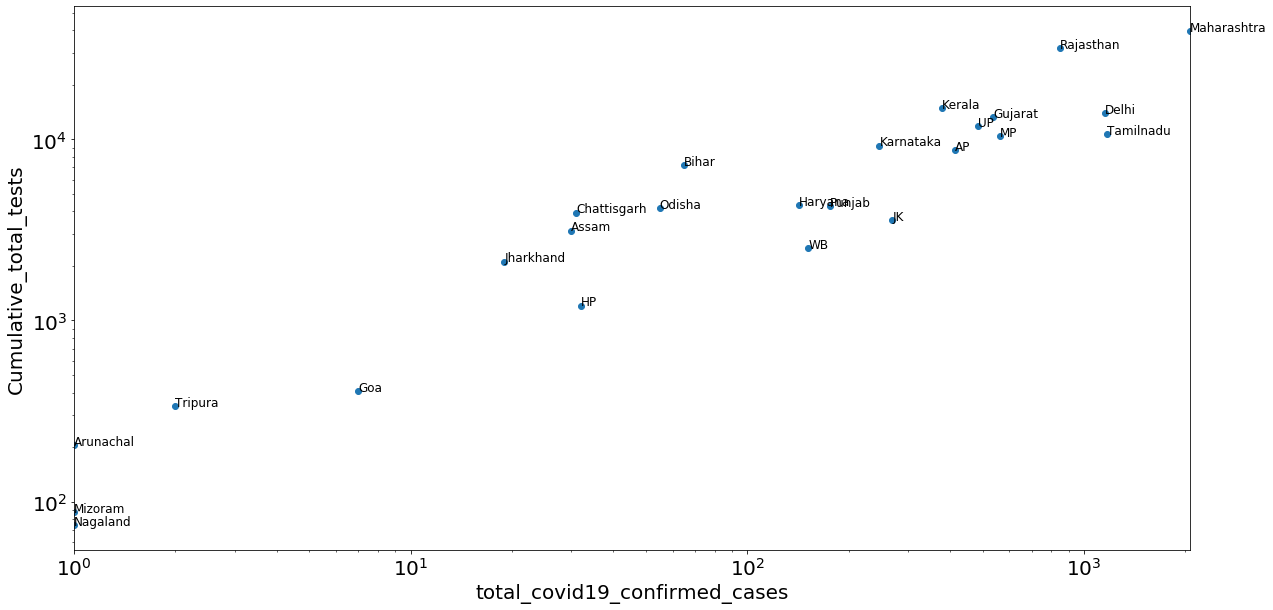

In [13]:
ax = df.set_index(x_axis)[y_axis].plot(style='o',
                                        figsize=(20,10),
                                          #yticks=[100,1000,10000,100000,1000000],
                                          #xticks=[1000,10000,100000,1000000]
                                         )
ax.set_xlabel(x_axis)
ax.set_ylabel(y_axis)
ax.set_yscale('log')
ax.set_xscale('log')
def label_point(x, y, val, ax):
    a = pd.concat({x_axis: x, y_axis: y, 'Entity': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point[x_axis], point[y_axis], str(point['Entity']),fontsize=12)
label_point(getattr(df,x_axis), getattr(df,y_axis), df.Entity, ax)
#plt.loglog(Y,X,color='red')
#plt.savefig('covid.png')

In [14]:
X_train = np.array(df[x_axis].tolist())
Y_train = np.array(df[y_axis].tolist())
X_train = np.reshape(X_train,(-1,1))
Y_train = np.reshape(Y_train,(-1,1))
print(X_train.shape,Y_train.shape)

(25, 1) (25, 1)


In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)
Y_train_pred = reg.predict(X_train)

In [16]:
#from sklearn.ensemble import RandomForestRegressor
#reg = RandomForestRegressor(max_depth=2, random_state=0)
#reg.fit(X_train, Y_train)
#Y_train_pred = reg.predict(X_train)

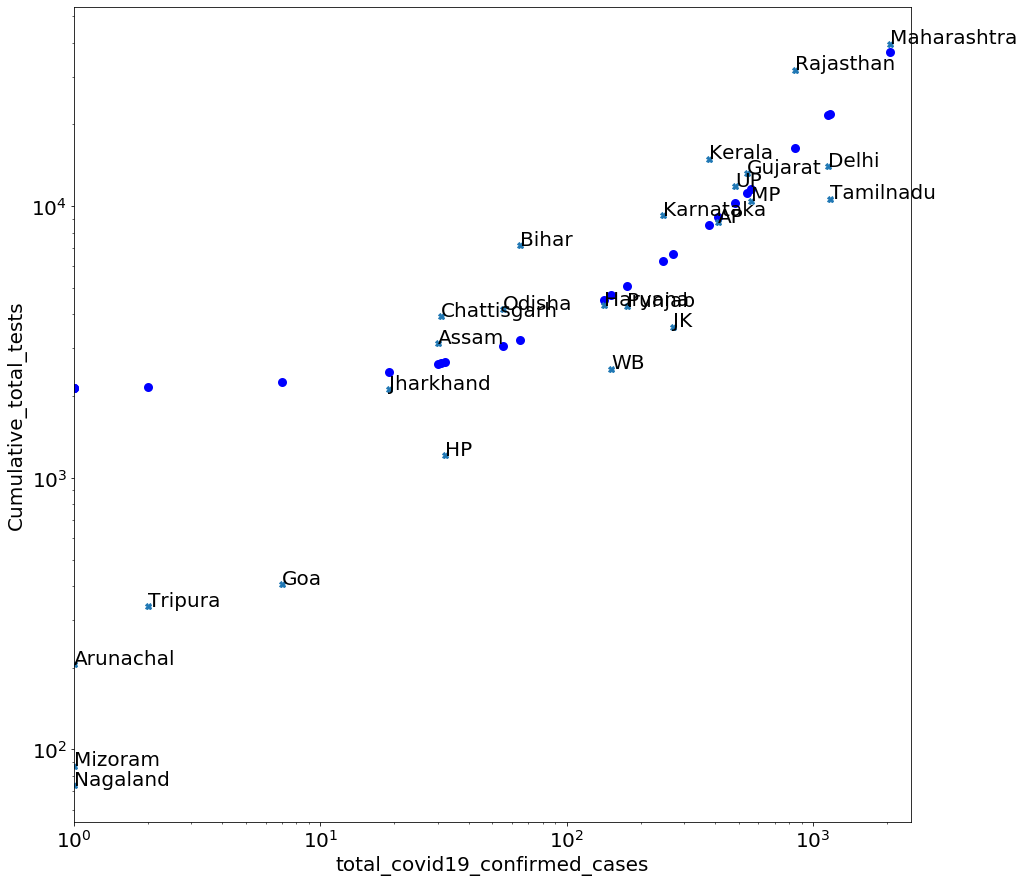

In [21]:
#df = df[:20]
#df2 = df2.sample(20)
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title
ax = df.set_index(x_axis)[y_axis].plot(style='X',
                                                                                   figsize=(15,15),
                                          #yticks=[100,1000,10000,100000,1000000],
                                          xticks=[100,500,1000,1500,2000,2500]
                                         )
ax.set_xlabel(x_axis)
ax.set_ylabel(y_axis)
ax.set_yscale('log')
ax.set_xscale('log')
def label_point(x, y, val, ax):
    a = pd.concat({x_axis: x, y_axis: y, 'Entity': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point[x_axis], point[y_axis], 
                str(point['Entity']),fontsize=20,
                #bbox=dict(facecolor='green', alpha=0.6)
               )
label_point(getattr(df,x_axis), getattr(df,y_axis), df.Entity, ax)
#plt.loglog(Y_test,X_test,color='blue',linewidth=3)
#plt.loglog(Y_pred,X_test,color='red',linewidth=3)
plt.scatter(X_train,Y_train_pred,color='blue',linewidth=3)
plt.savefig('indian_states_covid.png')

In [18]:
#predict cases for Telangana
X_test = np.array([[531]])
Y_test = reg.predict(X_test)
print(Y_test[0])

[11089.28681985]
